In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import entropy
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [57]:
def pca(points):
    data = np.zeros_like(points).reshape(-1, 2)
    data[:, 0] = points[0]
    data[:, 1] = points[1]
    pca = PCA()   #保留所有成分
    pca.fit(data)
    print(pca.explained_variance_ratio_)
    k = pca.components_[0, 1] / pca.components_[0, 0]
    return k
def threshold(img):
    """
        阈值化
        方法：根据灰度分布直方图，找到窗口中最亮的若干点
    """
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    cnt = 0
    th = 0
    for k in range(256):
        cnt = cnt + hist[255 - k]
        if cnt > 200:
            th = 255 - k - 1
            break
    ret, thImg = cv2.threshold(img,th,255,cv2.THRESH_BINARY)
    return thImg
def Kernel(size, width, theta):
    """
        构造卷积核
        
    参数：size：卷积核尺寸
          width：正区域宽度
          theta：角度
    注：(size - width)最好是偶数，以使得卷积核对称
    """
    temp = np.zeros((size + 10,size + 10))
    temp [(size - width) // 2 + 5:(size - width) // 2 + 5 + width,:] = 1
    temp = Image.fromarray(temp)
    temp = temp.rotate(theta)
    temp = np.array(temp)
    kernel = temp[5:-5, 5:-5]
    cnt = np.sum(kernel)
    print(cnt)
    for i in range(size):
        for j in range(size):
            kernel[i, j] = cnt / (cnt - size * size) if kernel[i, j] == 0 else kernel[i, j]
    kernel = kernel / 4
    return kernel
def Cluster(points):
    print(points.shape)
    data = points.T
    print(data.shape)
    # data = np.zeros_like(points).reshape(-1, 2)
    # data[:, 0] = points[0]
    # data[:, 1] = points[1]
    y_pred = DBSCAN(eps = 3, min_samples = 5).fit_predict(data)
    plt.figure(figsize = (8, 8))
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)
    plt.xlim((0, 100))
    plt.ylim((0, 100))
    plt.show()
    return y_pred

"\nCluster(points)\ntheta = pca(coordins)\ntheta1 = np.arctan(theta) * 180 / np.pi\nprint(theta, theta1)\nkernel = Kernel(11, 3, theta1)\nplt.figure()\nplt.imshow(kernel, cmap = 'gray')\n# plt.imshow(kernel, cmap = 'gray')\nret = cv2.filter2D(src, -1, kernel)\nplt.figure()\nplt.imshow(ret, cmap = 'gray')\nth = threshold(ret)\nplt.figure(dpi = 180)\nplt.imshow(th, cmap = 'gray')\npoints = np.array(np.where(th == 255))\ncoordins = np.vstack((points[1], src.shape[0] - points[0]))\ntheta = pca(coordins)\ntheta1 = np.arctan(theta) * 180 / np.pi\nprint(theta, theta1)\n"

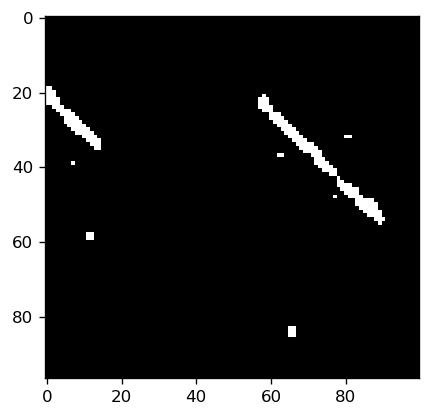

In [58]:
src = cv2.imread('222.png', 0)
src = cv2.blur(src, (3, 3))
th = threshold(src)
plt.figure(dpi = 120)
plt.imshow(th, cmap = 'gray')
points = np.array(np.where(th == 255))
coordins = np.vstack((points[1], src.shape[0] - points[0]))
'''
Cluster(points)
theta = pca(coordins)
theta1 = np.arctan(theta) * 180 / np.pi
print(theta, theta1)
kernel = Kernel(11, 3, theta1)
plt.figure()
plt.imshow(kernel, cmap = 'gray')
# plt.imshow(kernel, cmap = 'gray')
ret = cv2.filter2D(src, -1, kernel)
plt.figure()
plt.imshow(ret, cmap = 'gray')
th = threshold(ret)
plt.figure(dpi = 180)
plt.imshow(th, cmap = 'gray')
points = np.array(np.where(th == 255))
coordins = np.vstack((points[1], src.shape[0] - points[0]))
theta = pca(coordins)
theta1 = np.arctan(theta) * 180 / np.pi
print(theta, theta1)
'''

(2, 209)
(209, 2)


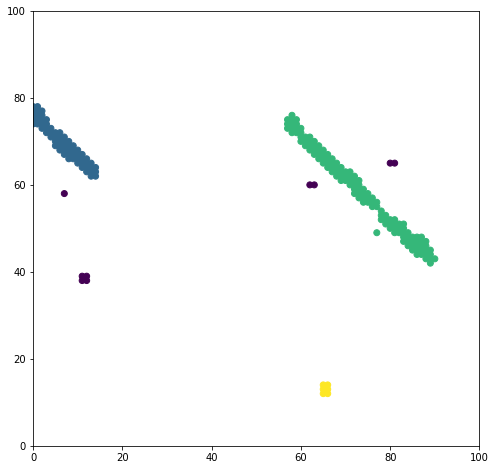

In [59]:
pred = Cluster(coordins)

In [153]:
np.unique(pred)

array([-1,  0], dtype=int64)

In [156]:
groups = []
for i in np.unique(pred):
    cnt = list(pred).count(i)
    if cnt > 50:
        groups.append(coordins[:, np.where(pred == i)].squeeze(1))
groups[0]

array([[ 84,  85,  86,  89,  90,  94,  98, 103,  64,  66,  78,  79,  80,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 103, 104, 108, 110, 111, 112,  84,
         86,  87,  88,  89,  90,  93,  94,  96,  97,  98, 122,  78,  80,
         82,  83],
       [ 87,  87,  87,  87,  87,  87,  87,  87,  86,  86,  86,  86,  86,
         86,  86,  86,  86,  86,  86,  86,  86,  86,  86,  86,  86,  86,
         86,  86,  86,  86,  86,  86,  86,  86,  86,  86,  86,  86,  85,
         85,  85,  85,  85,  85,  85,  85,  85,  85,  85,  84,  80,  80,
         80,  79]], dtype=int64)